# Path Of Exile's Meta game Analysis
In this analysis I will study the case of parallels markets in a game and how the player can use it for making profit.


---

## Intro
### Description of the trading mechanic :
POE is a hack n slash RPG from GGG in which trading has a key part for progressing in the game.

In POE, you can trade your currencies for stuff or other currencies, within the game with NPCs or outside the game with other players.

To trade with others you get to use an external website where every order is shown to everyone, like 'POE.trade'.

In addition, some websites can show you the evolution of prices across 120 days, due to some regulation of the POE API.
But in contrast with almost every other multiplayer-online games there is no fee to trade with other players or with NPCs.
The regulation comes from the rule of supply and demands of the players, except for a few examples.

The player can transform currencies in-game only in this order :

wisdom -> portal -> transmutation -> augmentation -> alteration -> jeweller -> fusing -> chance -> scouring -> regret -> alchemy

with some arbitrary conversion rate for each conversion.

---

### Problematic :
During my playtime a question came across my head :
Is there any benefits to hybrid trading ?

We'll try to find out if using hybrid market and conversions can help the player to generate profit.

### Methodology :
For the collecting and cleaning of the data I used Google spreadsheet.
Then for the visualisation and analysis I used Python.

In [1]:
#Import of libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

---
## A-Patterns

### First Case : Soft-core trading patterns analysis

The first analysis should determine if there is any profit available to the player buying currencies on the external market, then transform them in the in-game market and finally selling them back in the external market.

I used both market prices to set up transfer conditions. There is no exchange fee.
I set up my data in order to find where skipping the external market, and where getting back at it may be beneficial for the player.
Spreadsheet was used during this experimental phase.

In [2]:
#Loading of the first dataset : Soft-core POE Trade
df_soft_core_trade = pd.read_csv('data/softcore_trade.csv')

In [3]:
#A quick view of the first dataset
df_soft_core_trade.head()

,Currency,In-game change from a currency to another,Chaos POE.trade price,Trade game to market,Profit
0,Wisdom,1.00,0.0100,NaN,NaN
1,Portal,0.33,0.0400,0.013333,0.003333
2,Transmutation,0.14,0.0500,0.007143,-0.032857
3,Augmentation,0.25,0.1000,0.025000,-0.025000
4,Altération,0.25,0.3521,0.088025,-0.011975


In [4]:
df_soft_core_trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Currency                                   11 non-null     object 
 1   In-game change from a currency to another  11 non-null     float64
 2   Chaos POE.trade price                      11 non-null     float64
 3   Trade game to market                       10 non-null     float64
 4   Profit                                     10 non-null     float64
dtypes: float64(4), object(1)
memory usage: 568.0+ bytes


posx and posy should be finite values
posx and posy should be finite values


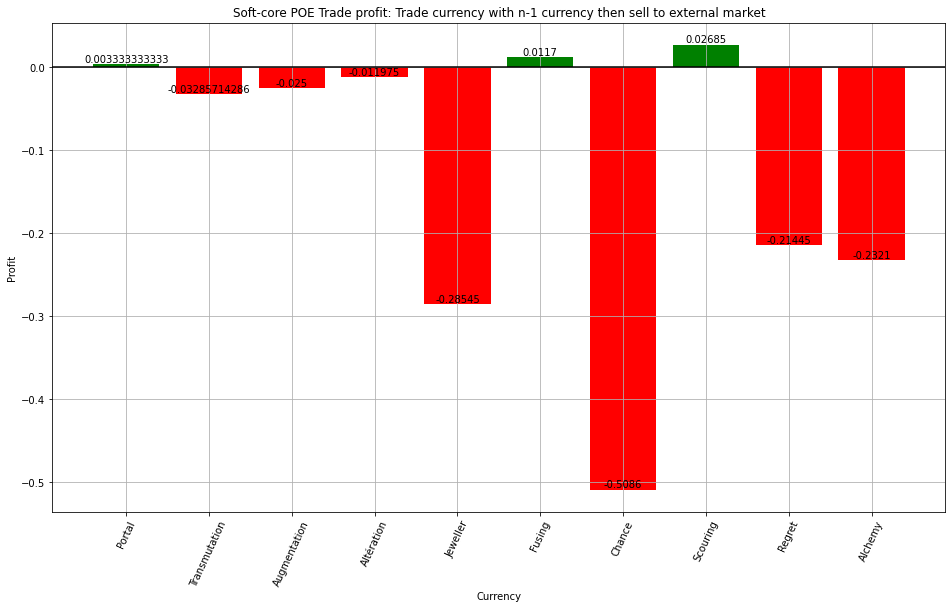

In [5]:
#plotting the benefits of the soft-core trade
def add_label(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha = 'center', va = 'bottom', fontsize = 10)
plt.figure(figsize=(16,9))
plt.bar(df_soft_core_trade['Currency'], df_soft_core_trade['Profit'], color=(df_soft_core_trade['Profit'] >= 0).map({True: 'g', False: 'r'}), label='Soft-core')
plt.grid()
plt.title('Soft-core POE Trade profit: Trade currency with n-1 currency then sell to external market')
plt.xlabel('Currency')
plt.ylabel('Profit')
plt.xticks(rotation=65)
plt.axhline(y=0, color='black', linestyle='-')
add_label(df_soft_core_trade['Currency'], df_soft_core_trade['Profit'])
plt.show()

The graph shows us that there is profit for the following conversions :
* wisdom to portal
* jeweller to fusing
* chance to scouring

Moreover, this first analysis will help me later to identify which trade I have to focus on.

### Quick Analysis for hardcore player base
Following the same steps for hardcore player base we get :

In [6]:
#Loading of the second dataset : hardcore POE Trade
df_hardcore_trade = pd.read_csv('data/hardcore_trade.csv')

In [7]:
#A quick view of the second dataset
df_hardcore_trade.head()

,Currency,In-game conversion,Chaos value external,Sale,Profit
0,Portal,0.333333,0.0133,0.004433,0.000000
1,Transmutation,0.142857,0.0250,0.003571,-0.009729
2,Augmentation,0.250000,0.0250,0.006250,-0.018750
3,Altération,0.250000,0.8330,0.208250,0.183250
4,Jeweller,0.500000,0.6250,0.312500,-0.520500


In [8]:
df_hardcore_trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Currency              10 non-null     object 
 1   In-game conversion    10 non-null     float64
 2   Chaos value external  10 non-null     float64
 3   Sale                  10 non-null     float64
 4   Profit                10 non-null     float64
dtypes: float64(4), object(1)
memory usage: 528.0+ bytes


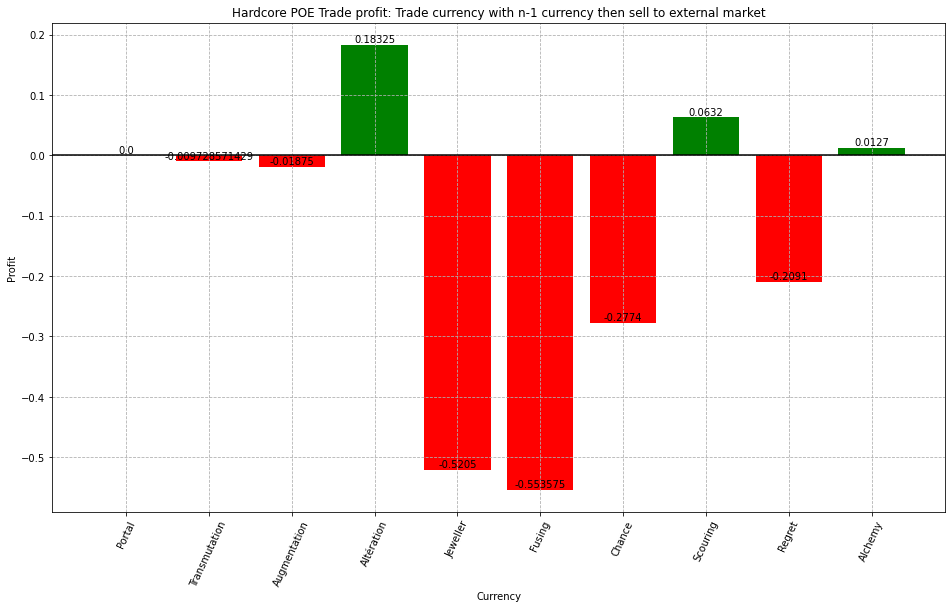

In [9]:
#plotting the benefits of the hardcore trade
plt.figure(figsize=(16,9))
plt.bar(df_hardcore_trade['Currency'], df_hardcore_trade['Profit'], color=(df_hardcore_trade['Profit'] >= 0).map({True: 'g', False: 'r'}), label='Hard-core')
plt.grid(linestyle='--')
plt.title('Hardcore POE Trade profit: Trade currency with n-1 currency then sell to external market')
plt.xlabel('Currency')
add_label(df_hardcore_trade['Currency'],df_hardcore_trade['Profit'])
plt.ylabel('Profit')
plt.xticks(rotation=65)
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

Without going into details, less trade offers are available, for example
there is no trade wisdom -> portal.

Trends are different, we can explain it by a different need of the public using this market. Here they use the best currencies for crafting items.

The other ones are missing, because the players thoroughly scan the market.

### Comparison between the two markets :

* Both markets have three positive conversion in game.
* The best conversion for the soft-core model is converting scouring to chance with 2% benefits.
* The best conversion for the hardcore model is converting alteration to jeweller with 18% benefits
* But only the hardcore market is able to make more than 10% percent on a currency. Which is important for this kind of market with no regulations.

## B-Focus
### Focus on the conversion Jeweller to Fusing in the soft-core model market

I will try in this part to analyze the complete cycle of purchase to sale for the Jeweller-Fusing trade in the soft-core market.

In [10]:
#import of the dataset
detail_trade_soft = pd.read_csv('data/Detail_jeweller_fusing.csv')
detail_trade_soft.head()

,Purchase price(for a chaos n° of jeweller),Profit (0.50 sale price),Profit (0.55sale price),Profit (0.6 sale price)
0,4.6,-0.43,-0.37,-0.31
1,4.7,-0.41,-0.35,-0.30
2,4.8,-0.40,-0.34,-0.28
3,4.9,-0.39,-0.33,-0.27
4,5.0,-0.38,-0.31,-0.25


This dataset was obtained with Google spreadsheet. I will reproduce it using Pandas.

I get the formula for profit :
$Profit = (purchase number / conversion rate * sale price) - purchase_price$

In this case :
$Profit = (purchase number / 4 * sale price) - 1$

I'll take three different scenarios for the sale price: 0.5, 0.55, 0.6

In [11]:
#initializing the range for purchases
purchase_number = np.linspace(4.5, 9, 100)

#I use 3 different scenarios for the sale price with 3 different lambdas functions
profit1 = list(map(lambda x: x/4*0.5-1, purchase_number))
profit2 = list(map(lambda x: x/4*0.55-1, purchase_number))
profit3 = list(map(lambda x: x/4*0.6-1, purchase_number))

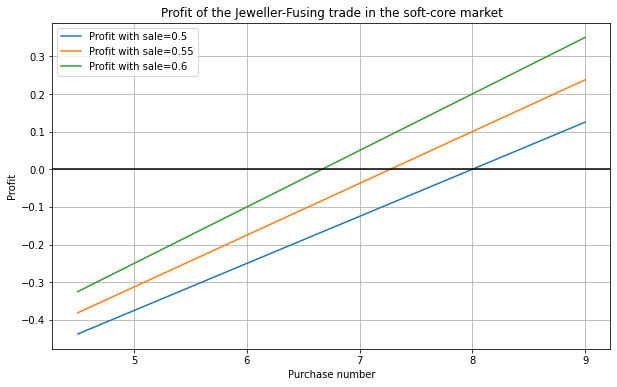

In [12]:
data = {'Purchase_number' : purchase_number, 'Profit with sale=0.5' : profit1,'Profit with sale=0.55': profit2,'Profit with sale=0.6' : profit3 }
df = pd.DataFrame(data)
figure = df.plot(x='Purchase_number', figsize = (10,6))
figure.axhline(y=0,color='k')
figure.set_title('Profit of the Jeweller-Fusing trade in the soft-core market')
figure.set_xlabel('Purchase number')
figure.set_ylabel('Profit')
figure.grid()

Here I get in the details for the Trade Jeweller-Fusing, still using chaos orb as metric currency.
As everyone does in this game, it's kind of like the euro or the dollar for the POE market.

The graph above resumes the different scenarios. For different purchase prices of jeweller in chaos,
and different sales prices of fusing in chaos.

I took these three scenarios because they represent high, medium and low sales prices.
Between 5 or 8 Jewellers for 1 chaos I have the all-time prices market for the purchases.

# Conclusion
I was able to determine that the hybrid market can be beneficial for the player, in both soft-core and hardcore mode. Plus I found out the best practices for the conversion chaos-jeweller-fusing-chaos to determine if there will be profits or not for the player.